In [ ]:
#!/bin/PYTHONscript
###### HEADER ############################################
# Author:  Thomas Frölicher (thomas.froelicher@unibe.ch)
#          Erich M. Fischer (erich.fischer@env.ethz.ch)
#          Joel Zeder (joel.zeder@env.ethz.ch)
#          Natacha Le Grix (natacha.legrix@unibe.ch)
#.         Jitendra Singh (jitendra.singh@env.ethz.ch)
# Date:    01.09.24 and 06.09.2024
# Purpose: Detection and Attribution Exercise (Swiss Climate Summer School 2024)

In [1]:
#### LOAD LIBRARIES ##########################################################
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import genextreme as gev
from scipy.stats import rankdata
from scipy.stats import genextreme as gev

In [2]:
# Settings
path_data_in = "~/Data_Input/"
## Select input data (by un-commenting the respective line):

## Western Europe Heatwave  - regional and local (London gridpoint):
# DA_data_path = os.path.join(path_data_in, "heatwave_we", "WesternEurope_Heatwave.csv")
DA_data_path = os.path.join(path_data_in, "heatwave_we", "London_Heatwave.csv")

# Read input data
DA_data_df = pd.read_csv(DA_data_path)
DA_data_df['model'] = DA_data_df['model'].astype('category')
DA_data_df['ens'] = DA_data_df['ens'].astype('category')

# Filter for observations in 2022
DA_obs2022_df = DA_data_df[(DA_data_df['year'] == 2022) & (DA_data_df['model'] == 'ERA5')]
#DA_obs2022_df # View data structure: UNCOMMENT TO PRINT
#DA_data_df # View data structure: UNCOMMENT TO PRINT

## ----------  DON'T UNCOMMENT THIS SECTION -----------------------------------------------
## How does the data look like?
## One data.frame with columns
## "model"     - models depending on location/variable
## "ens"       - ensemble member, always 1 for ERA5 or satellite observations
## "year"      - model or observation year
## <index>     - the extreme value index (e.g. tx5d , ...)
## <index_ano> - anomaly against 1981 - 2010 baseline (e.g. JJA average)
## "gmst_ano"  - smoothed GMST anomaly against 1981 - 2010


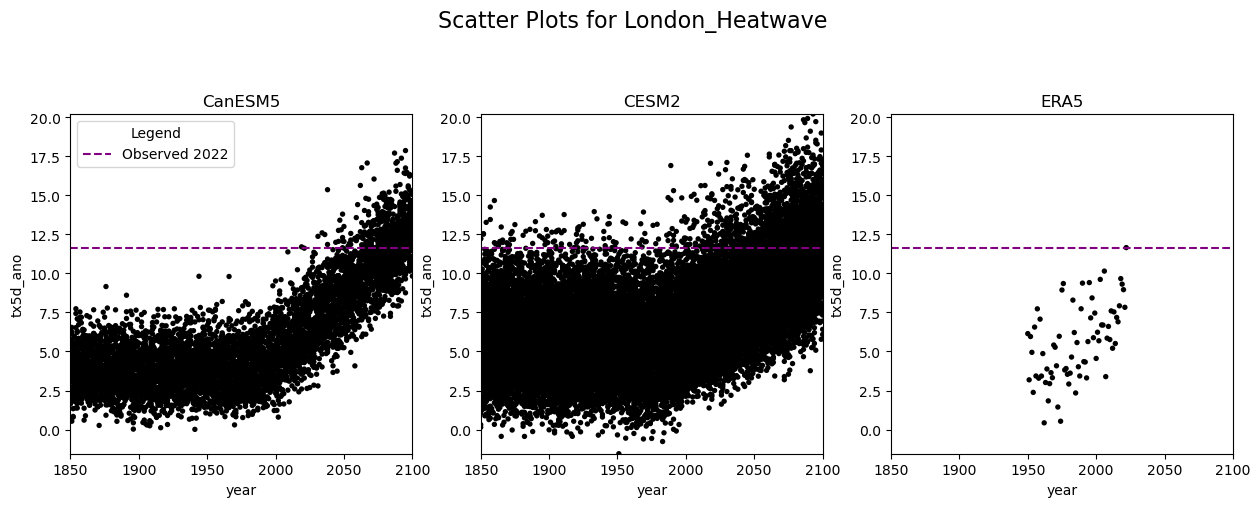

In [3]:
##################################
## Plot start here
####################################
plt.figure(figsize=(15, 15))

x_range = (1850, 2100) # Define x-axis range
y_range = (DA_data_df['tx5d_ano'].min(), DA_data_df['tx5d_ano'].max()) # Define y-axis range

plt.suptitle('Scatter Plots for ' + os.path.splitext(os.path.basename(DA_data_path))[0], fontsize=16, y=0.95)

# Scatter plots for all models (Top Row) in grey color, with smaller dots and no border
for i, model in enumerate(['CanESM5', 'CESM2', 'ERA5'], 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=DA_data_df[DA_data_df['model'] == model], x='year', y='tx5d_ano', color='black', legend=False, s=15,  # Set smaller dot size
        edgecolor='none' )
    plt.axhline(DA_obs2022_df['tx5d_ano'].mean(), color='purple', linestyle='--', label='Observed 2022')
    #plt.title('Scatter Plots for ' + os.path.splitext(os.path.basename(DA_data_path))[0])
    plt.xlim(x_range)
    plt.ylim(y_range)  # Set y-axis range
    plt.title(f'{model}')
    if i == 1:
        plt.legend(title='Legend', loc='upper left')
plt.show()